In [1]:
# Explanation of Columns:
case_linked = "This is the package plan status, that either patient plan is active or not."
total_closed_invoices_before_appt = "How many invoices patient has paid before this appointment."
total_good_appointments_before_cancelled_appt = "How many good appointments patient has taken before this cancelled appointment."
total_cancel_appt_before_cancelled_appt = "How many appointments patient has cancelled before this cancelled appointment."
patient_status = "What is the status of patient. Either his followup is going on or treatment has been ended."
patient_type = "This is the type of patient, either he is old patient or new patient, or first time came to clinic."
notice = "How many hours before appointment he has cancelled the booking."
case_type = "What type of package is this. Either unlimited appointments or limited appointments."
cancelled_at = "Date and time of appointment cancelation. Kis date pa cancel hui ha appointment."
appointement_type = "With whom the appointment was. With physiotherapist, or nutritionist."
billable_item = ""
appointemnt_start_time = "What was the date time of appointment?"
Business_name = "Which department he has visited. Check that."
customer_type = "What type of discount he has availed. Either he has availed any discount or not."

In [2]:
# import pandas as pd
# # from ydata_profiling import ProfileReport

# final_df = pd.read_csv("Data/Final_Clean_Dataset.csv")

In [3]:
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("CleanDataAnalysisReport.html")

# Data Cleaning

In [4]:
# def fill_missing_values_with_top_values(df, column, percentages, number):
#     import numpy as np
#     top_values = df[column].value_counts().index[:number]
#     num_missing = df[column].isnull().sum()
#     fill_values = []
#     for i, percentage in enumerate(percentages):
#         count = int(np.ceil((percentage / 100) * num_missing))
#         fill_values.extend([top_values[i]] * count)
#     np.random.shuffle(fill_values)
#     fill_values = fill_values[:num_missing]
#     df.loc[df[column].isnull(), column] = fill_values
#     return df

In [5]:
# df['case_type'] = df['case_type'].fillna("Not Available")
# most_freq_day = df['day_of_week'].mode()[0].strip()
# df['day_of_week'] = df['day_of_week'].fillna(most_freq_day)
# most_freq_month = df['month_of_year'].mode()[0].strip()
# df['month_of_year'] = df['month_of_year'].fillna(most_freq_month)
# most_freq_month_day = df['day_of_month'].mode()[0]
# df['day_of_month'] = df['day_of_month'].fillna(most_freq_month_day)
# most_freq_week = df['week_of_year'].mode()[0]
# df['week_of_year'] = df['week_of_year'].fillna(most_freq_week)
# df = fill_missing_values_with_top_values(df, 'billable_item', [30, 30, 10, 20, 10], 5)
# df = fill_missing_values_with_top_values(df, 'category', [30, 30, 20, 20, 10], 5)
# df['customer_type'] = df['customer_type'].fillna("No Type")
# df = fill_missing_values_with_top_values(df, 'title', [35, 35, 30], 3)
# df = fill_missing_values_with_top_values(df, 'state', [35,35,30], 3)
# most_freq_dob = df['date_of_birth'].mode()[0]
# df['date_of_birth'] = df['date_of_birth'].fillna(most_freq_month)
# df = fill_missing_values_with_top_values(df, 'sex', [50,50], 2)
# df = fill_missing_values_with_top_values(df, 'city', [30,20,20,10,10,10], 6)
# df['occupation'] = df['occupation'].fillna("No Occupation")


In [6]:
# # reanme column with column index
# df.rename(columns={df.columns[0]: "hospital_id"}, inplace=True)
# df.drop(columns=['post_code'], inplace=True)
# df.drop_duplicates(inplace=True)

In [7]:
# df.to_csv("Final_Clean_Dataset.csv", index=False)

# Importing Libraries

In [8]:
import plotly.express as px
import pandas as pd

final_df = pd.read_csv("Data/Final_Clean_Dataset.csv")

# Exploratory Data Analysis

In [9]:
cancelled_appointments = final_df[final_df['cancelled'] == 'Yes']
Good_appointments = final_df[final_df['cancelled'] == 'No']

# Recurring Patients
### Recurring patients seem to have a higher number of cancellations compared to new patients. This could be due to the frequency of their visits, leading to more opportunities for cancellations.
### New patients also do some cancellations, but this might be due to initial uncertainties or dissatisfaction with the service or getting comment about the service from anyone else.

In [10]:
billing = final_df.groupby([final_df['patient_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="patient_type", y="count", color='cancelled')
fig.show()

In [11]:
billing = final_df.groupby([final_df['patient_type'].dropna(), 'cancelled']).size().reset_index(name='count')
billing['percentage'] = billing['count'] / billing.groupby('patient_type')['count'].transform('sum') * 100
fig = px.histogram(billing, x="patient_type", y="percentage", color='cancelled',
                   labels={'percentage': 'Percentage'})
fig.update_layout(
    yaxis_title="Percentage",
    title="Percentage of Patient Types by Cancellation Status",
    bargap=0.2
)
fig.show()

# Appointment Status

### This pattren show that most of the patients, who cancel their appointment once more likely to face similar issues resulting in a lower probablity of attending even after re-booking.

In [12]:
column_used = "appointment_status"

apt_status = cancelled_appointments['appointment_status'].value_counts()

fig = px.pie(values=apt_status.values, names=apt_status.index, title='Cancelled Cancellation',
             labels={'labels':'Appointment Status', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value+percent', 
                  texttemplate='%{label}: %{value} (%{percent:.2%})')
fig.show()

In [13]:
column_used = "appointment_status"

apt_status_1 = Good_appointments['appointment_status'].value_counts()

fig = px.pie(values=apt_status_1.values, names=apt_status_1.index, title='Good Appointment',
             labels={'labels':'Appointment Status', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='label+percent', hoverinfo='label+value', 
                  texttemplate='%{label}: %{value} (%{percent:.2%})')
fig.show()

# Patient Demographics

## By State

In [14]:
def preprocess_states_data(df):
    df['state'] = df['state'].str.lower().str.strip()
    abbreviated_states_for_queensland = ['qld', 'gld', 'q', 'gladston', 'gladstone', 'ald', 'queensland', 'davao del sur', 'west gladstone', 'ald','4019', 'qld 4020','4504', 'brookfield', 'north lakes', 'clifton beach','new auckland', 'clontarf', 'margate', 'kippa ring', 'burua', 'kippa-ring', 'tannum sands',]
    abbreviated_states_for_tasmania = ['y', 'tasmania', 'tas','test',  ]
    abbreviated_states_for_new_south_wales = ['nsw', 'nt', 'newport', 'new south wales','nz']
    abbreviated_states_for_victoria = ['vic', 'victoria', 'voc', 'bvic', 'vic 3340','viv',  'vicq', 'vic 3337', 'eynesbury', '3352', 'maddingley', 'hopetoun park','bacchus marsh', 'strathtulloh', 'melton west', 'victoria vic', 'melton south', 'melbourne', 'darley', 'sunbury']
    abbreviated_states_for_western_australia = ['wa', 'western australia', 'scarborough', ]
    abbreviated_states_for_south_australia = ['sa', 'act']
    df['state'] = df['state'].replace(abbreviated_states_for_queensland, 'queensland')
    df['state'] = df['state'].replace(abbreviated_states_for_tasmania, 'tasmania')
    df['state'] = df['state'].replace(abbreviated_states_for_new_south_wales, 'new south wales')
    df['state'] = df['state'].replace(abbreviated_states_for_victoria, 'victoria')
    df['state'] = df['state'].replace(abbreviated_states_for_western_australia, 'western australia')
    df['state'] = df['state'].replace(abbreviated_states_for_south_australia, 'south australia')
    return df

In [15]:
# states = final_df['state'].str.upper().str.strip().value_counts()
column_used = "state"
final_df = preprocess_states_data(final_df)
demographics = final_df.groupby([final_df['state'].str.upper().str.strip(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(demographics, x="state", y="count", color='cancelled')
fig.show()


In [16]:
demographics = final_df.groupby([final_df['state'].str.upper().str.strip(), 'cancelled']).size().reset_index(name='count')
demographics['percentage'] = demographics.groupby('state')['count'].transform(lambda x: x / x.sum() * 100)

fig = px.histogram(demographics, x="state", y="percentage", color='cancelled', 
                   labels={'percentage': 'Percentage'}, barmode='group')
fig.update_layout(
    yaxis_title="Percentage",
    title="Percentage of Cancelled Appointments by State",
    bargap=0.2
)
fig.show()


## By City

In [17]:
final_df['city'].value_counts()

city
Scarborough    30459
GLADSTONE      23498
Newport        17170
Redcliffe      11776
Margate         8262
               ...  
Gooburrum          1
Lae                1
Carseldine         1
ORMISTON           1
Kenilworth         1
Name: count, Length: 901, dtype: int64

In [18]:
final_df['city'] = final_df['city'].str.upper().str.strip()
top_10_cities = final_df['city'].value_counts().head(10).index
filtered_df = final_df[final_df['city'].isin(top_10_cities)]
demographics = filtered_df.groupby([filtered_df['city'], 'cancelled']).size().reset_index(name='count')
fig = px.histogram(demographics, x="city", y="count", color='cancelled', title='Number of Cancelled and Not Cancelled Appointments by City')
fig.show()

In [19]:
final_df['city'] = final_df['city'].str.upper().str.strip()
top_10_cities = final_df['city'].value_counts().head(15).index
filtered_df = final_df[final_df['city'].isin(top_10_cities)]
demographics = filtered_df.groupby(['city', 'cancelled']).size().reset_index(name='count')
total_counts = filtered_df.groupby('city').size().reset_index(name='total_count')
demographics = demographics.merge(total_counts, on='city')
demographics['percentage'] = (demographics['count'] / demographics['total_count']) * 100
fig = px.histogram(demographics, x="city", y="percentage", color='cancelled', barmode='group',
                   title='Percentage of Cancelled and Not Cancelled Appointments by City',
                   labels={'percentage': 'Percentage of Appointments'})
fig.show()

# Age Data

In [20]:
final_df['date_of_birth'] = final_df['date_of_birth'].str.replace('May', '1978-05-30')
final_df['date_of_birth'] = pd.to_datetime(final_df['date_of_birth'])
bins = pd.date_range(start=final_df['date_of_birth'].min(), end='2024-04-01', freq='7Y')
final_df['dob_bin'] = pd.cut(final_df['date_of_birth'], bins=bins, right=False)
demographics = final_df.groupby(['dob_bin', 'cancelled']).size().reset_index(name='count')
total_counts = final_df.groupby('dob_bin').size().reset_index(name='total_count')
demographics = demographics.merge(total_counts, on='dob_bin')
demographics['percentage'] = (demographics['count'] / demographics['total_count']) * 100
demographics['dob_bin_str'] = demographics['dob_bin'].apply(lambda x: f"{x.left.strftime('%Y-%m-%d')} - {x.right.strftime('%Y-%m-%d')}")
fig = px.histogram(demographics, x='dob_bin_str', y='percentage', color='cancelled', barmode='group',
                   title='Percentage of Appointments by Date of Birth',
                   labels={'dob_bin_str': 'Date of Birth', 'percentage': 'Percentage of Appointments'})
fig.update_layout(
    xaxis_title='Date of Birth',
    yaxis_title='Percentage',
    )
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3396\4187360458.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_3396\4187360458.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_3396\4187360458.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

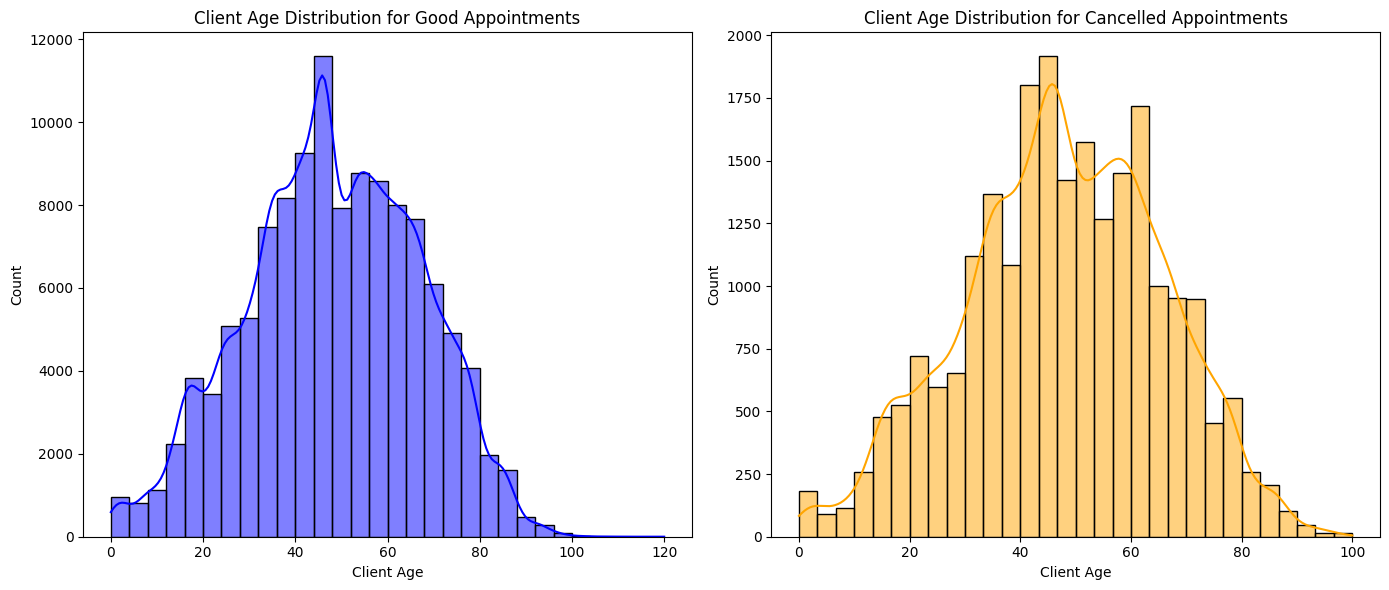

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming the current date is '2024-06-06'
current_date = pd.to_datetime('2024-06-06')
Good_appointments['date_of_birth'] = Good_appointments['date_of_birth'].str.replace('May', '1978-05-30')
cancelled_appointments['date_of_birth'] = cancelled_appointments['date_of_birth'].str.replace('May', '1978-05-30')

# Convert the birth date to datetime
Good_appointments['birth_date'] = pd.to_datetime(Good_appointments['date_of_birth'])
cancelled_appointments['birth_date'] = pd.to_datetime(cancelled_appointments['date_of_birth'])

# Calculate age
Good_appointments['client_age'] = (current_date - Good_appointments['birth_date']).dt.days // 365
cancelled_appointments['client_age'] = (current_date - cancelled_appointments['birth_date']).dt.days // 365

# Visualizing the impact of client age
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(Good_appointments['client_age'], bins=30, kde=True, color='blue')
plt.title('Client Age Distribution for Good Appointments')
plt.xlabel('Client Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(cancelled_appointments['client_age'], bins=30, kde=True, color='orange')
plt.title('Client Age Distribution for Cancelled Appointments')
plt.xlabel('Client Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Billing and Concession

In [22]:
# final_df['customer_type'].dropna().value_counts()

In [23]:
billing = final_df.groupby([final_df['customer_type'].dropna().str.upper().str.strip(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="customer_type", y="count", color='cancelled')
fig.show()

In [24]:
final_df['customer_type'] = final_df['customer_type'].dropna().str.upper().str.strip()
billing = final_df.groupby(['customer_type', 'cancelled']).size().reset_index(name='count')
total_counts = final_df.groupby('customer_type').size().reset_index(name='total_count')
billing = billing.merge(total_counts, on='customer_type')
billing['percentage'] = (billing['count'] / billing['total_count']) * 100
fig = px.histogram(billing, x='customer_type', y='percentage', color='cancelled', barmode='group',
                   title='Percentage of Appointments by Customer Type',
                   labels={'customer_type': 'Customer Type', 'percentage': 'Percentage of Appointments'})
fig.show()

# Case Type 

In [25]:
final_df['case_linked'].value_counts()

case_linked
Yes    80639
No     61949
Name: count, dtype: int64

In [26]:
final_df = final_df.dropna(subset=['case_linked'])
billing = final_df.groupby(['case_linked', 'cancelled']).size().reset_index(name='count')
total_counts = final_df.groupby('case_linked').size().reset_index(name='total_count')
billing = billing.merge(total_counts, on='case_linked')
billing['percentage'] = (billing['count'] / billing['total_count']) * 100
fig = px.histogram(billing, x='case_linked', y='percentage', color='cancelled', barmode='group',
                   title='Percentage of Appointments by Case Linked',
                   labels={'case_linked': 'Case Linked', 'percentage': 'Percentage of Appointments'})
fig.show()


# Total Good Appointments

### Total number of Good appointments are mostly those appointments which have no appointment before this. This shows that the new patients are coming to the clinic, but Recurring patients are cancelling there appointments. 
### So we should have to consider about our services, what's the fault in our system, that patients not coming again.

In [27]:
billing = final_df.groupby([final_df['total_good_appointments_before_appointment'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="total_good_appointments_before_appointment", y="count", color='cancelled')
fig.show()

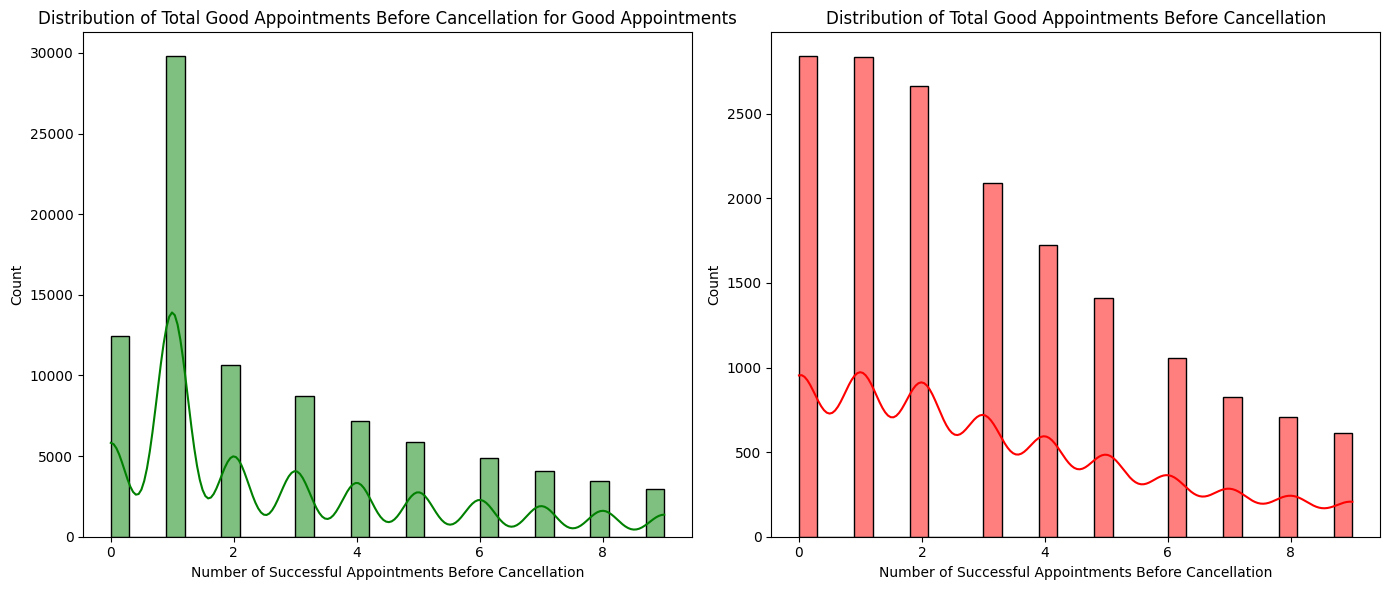

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

good_appt_filtered = Good_appointments[Good_appointments['total_good_appointments_before_appointment'] < 10]
cancelled_appt_filtered = cancelled_appointments[cancelled_appointments['total_good_appointments_before_appointment'] < 10]
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(good_appt_filtered['total_good_appointments_before_appointment'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Good Appointments Before Cancellation for Good Appointments')
plt.xlabel('Number of Successful Appointments Before Cancellation')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(cancelled_appt_filtered['total_good_appointments_before_appointment'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Good Appointments Before Cancellation')
plt.xlabel('Number of Successful Appointments Before Cancellation')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Type of Appointment Status

### This shows that two types of servies are not good accoeding to the data, most of the cancellations are done by due to these services.
## !. Physiotherapy, 30 Minutes Follow Up
## 2. Subsequant Consultaion Week Day

### These are the two departments we must have to focus on that. Due to these departments most of the time appointments are being cancelled.

In [29]:
import plotly.express as px

apt_status = final_df['appointment_type'].value_counts().head(12)
fig = px.pie(values=apt_status.values, names=apt_status.index, title='Appointment Type Of Cancellation',
             labels={'labels':'Appointment Type', 'values':'Cancelled Appointments'})
fig.update_traces(textinfo='percent', hoverinfo='label+value', 
                  texttemplate='%{percent:.2%}')
fig.show()


In [30]:
# top_10_appointment_types = final_df['appointment_type'].value_counts().head(10).index
# filtered_df = final_df[final_df['appointment_type'].isin(top_10_appointment_types)]
# filtered_df['is_cancelled'] = filtered_df['cancelled'].apply(lambda x: 'Cancelled' if x == 1 else 'Not Cancelled')
# fig = px.histogram(
#     filtered_df,
#     x='appointment_type',
#     color='cancelled',
#     barmode='stack',
#     title='Top 10 Appointment Types with Respect to Cancelled Appointments',
#     labels={'appointment_type': 'Appointment Type', 'count': 'Number of Appointments'},
#     category_orders={'appointment_type': top_10_appointment_types}
# )
# fig.update_layout(
#     xaxis_title='Appointment Type',
#     yaxis_title='Number of Appointments',
#     legend_title_text='Appointment Status'
# )
# fig.show()

In [31]:
final_df['appointment_type'] = final_df['appointment_type'].str.upper().str.strip()
top_10_cities = final_df['appointment_type'].value_counts().head(15).index
filtered_df = final_df[final_df['appointment_type'].isin(top_10_cities)]
demographics = filtered_df.groupby(['appointment_type', 'cancelled']).size().reset_index(name='count')
total_counts = filtered_df.groupby('appointment_type').size().reset_index(name='total_count')
demographics = demographics.merge(total_counts, on='appointment_type')
demographics['percentage'] = (demographics['count'] / demographics['total_count']) * 100
fig = px.histogram(demographics, x="appointment_type", y="percentage", color='cancelled', barmode='group',
                   title='Percentage of Appointments by Departments',
                   labels={'percentage': 'Percentage of Appointments'})
fig.show()

# Monthly Pattren

### There are almost same type of cancellations in every month. So that's not effect that much, or not any pattren in this.

In [32]:
billing = final_df.groupby([final_df['month_of_year'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="month_of_year", y="count", color='cancelled')
fig.show()

In [33]:
billing = final_df.groupby([final_df['month_of_year'].dropna(), 'cancelled']).size().reset_index(name='count')
monthly_totals = billing.groupby('month_of_year')['count'].transform('sum')
billing['percentage'] = billing['count'] / monthly_totals * 100
fig = px.histogram(billing, x="month_of_year", y="percentage", color='cancelled', barmode='group',
                   labels={'percentage': 'Percentage of Appointments'})
fig.update_layout(
    xaxis_title='Month of Year',
    yaxis_title='Percentage of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()


# Package Plan

### There is high probablity of cancellation of appointment if the patient has unlimited number of appointments.

In [34]:
billing = final_df.groupby([final_df['case_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="case_type", y="count", color='cancelled')
fig.show()

In [35]:
billing = final_df.groupby([final_df['case_type'].dropna(), 'cancelled']).size().reset_index(name='count')
case_totals = billing.groupby('case_type')['count'].transform('sum')
billing['percentage'] = billing['count'] / case_totals * 100
fig = px.histogram(billing, x="case_type", y="percentage", color='cancelled', barmode='group',
                   labels={'percentage': 'Percentage of Appointments'})
fig.update_layout(
    xaxis_title='Case Type',
    yaxis_title='Percentage of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()

# Business Name

In [36]:
billing = final_df.groupby([final_df['business_name'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="business_name", y="count", color='cancelled')
fig.show()

In [37]:
billing = final_df.groupby([final_df['business_name'].dropna(), 'cancelled']).size().reset_index(name='count')
business_totals = billing.groupby('business_name')['count'].transform('sum')
billing['percentage'] = billing['count'] / business_totals * 100
fig = px.histogram(billing, x="business_name", y="percentage", color='cancelled', barmode='group',
                   labels={'percentage': 'Percentage of Appointments'})
fig.update_layout(
    xaxis_title='Business Name',
    yaxis_title='Percentage of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()

In [38]:
billing = final_df.groupby([final_df['customer_type'].dropna(), 'cancelled']).size().reset_index(name='count')
fig = px.histogram(billing, x="customer_type", y="count", color='cancelled')
fig.show()

In [39]:
billing = final_df.groupby([final_df['customer_type'].dropna(), 'cancelled']).size().reset_index(name='count')
customer_totals = billing.groupby('customer_type')['count'].transform('sum')
billing['percentage'] = billing['count'] / customer_totals * 100
fig = px.histogram(billing, x="customer_type", y="percentage", color='cancelled', barmode='group',
                   labels={'percentage': 'Percentage of Appointments'})
fig.update_layout(
    xaxis_title='Customer Type',
    yaxis_title='Percentage of Appointments',
    legend_title_text='Appointment Status'
)
fig.show()

<!-- Columns to Discuss -->

1) sessions_left
2) cancelled_at
3) case_type
4) cancelled_at
5) customer_type